<a href="https://colab.research.google.com/github/AyaanAhmed2002/AJAX-Movie-Recommendation-System-with-Sentiment-Analysis/blob/master/CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  sampleSubmission.csv  train.7z
sample_data   test.7z		    trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.6/413.6 kB 22.5 MB/s eta 0:00:00


In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode = 'r')
archive.extractall()
archive.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['43547.png', '24401.png', '12112.png', '32670.png', '35120.png']
['18551.png', '44278.png', '26836.png', '8058.png', '36430.png']


In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 14742]

,id,label
14741,14742,horse


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_dictionary = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


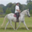

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/14742.png')
cv2_imshow(img)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
train_data_folder = '/content/train'

data = []

for id in id_list:
  image = Image.open(train_data_folder + '/' + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
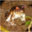

In [ ]:
data[0]

In [ ]:
x = np.array(data)
y = np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255


In [ ]:
x_train_scaled[0]

array([[[0.13333333, 0.14117647, 0.16862745],
        [0.14509804, 0.14509804, 0.2       ],
        [0.17254902, 0.17254902, 0.25098039],
        ...,
        [0.24313725, 0.28627451, 0.36470588],
        [0.20392157, 0.24705882, 0.3254902 ],
        [0.17647059, 0.22352941, 0.30196078]],

       [[0.1372549 , 0.1372549 , 0.14509804],
        [0.13333333, 0.13333333, 0.15686275],
        [0.13333333, 0.12941176, 0.16862745],
        ...,
        [0.22745098, 0.27058824, 0.34901961],
        [0.19607843, 0.23529412, 0.31372549],
        [0.18431373, 0.22745098, 0.30588235]],

       [[0.13333333, 0.12941176, 0.1372549 ],
        [0.12941176, 0.1254902 , 0.14117647],
        [0.12941176, 0.1254902 , 0.14901961],
        ...,
        [0.25882353, 0.30196078, 0.38039216],
        [0.2       , 0.24313725, 0.32156863],
        [0.20784314, 0.25098039, 0.32941176]],

       ...,

       [[0.1254902 , 0.1254902 , 0.14901961],
        [0.1254902 , 0.12156863, 0.14509804],
        [0.12941176, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
model.fit(x_train_scaled, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.2447 - loss: 2.0492 - val_acc: 0.3568 - val_loss: 1.7931
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3597 - loss: 1.7817 - val_acc: 0.3805 - val_loss: 1.7150
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3957 - loss: 1.6802 - val_acc: 0.3913 - val_loss: 1.6848
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.4097 - loss: 1.6312 - val_acc: 0.4105 - val_loss: 1.6441
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.4355 - loss: 1.5821 - val_acc: 0.4365 - val_loss: 1.5880
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4416 - loss: 1.5546 - val_acc: 0.4173 - val_loss: 1.6429
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.4552 - loss: 1.5283 - val_acc: 0.4300 - val_loss: 1.5986
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4645 - loss: 1.4946 - val_acc: 0.4593 - val_loss: 1.5386
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dropout, Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (256, 256, 3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation = 'relu'))

In [ ]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(x_train_scaled, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 444s 347ms/step - acc: 0.1673 - loss: 7.5935 - val_acc: 0.4793 - val_loss: 3.8332
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 412s 347ms/step - acc: 0.3240 - loss: 4.8046 - val_acc: 0.5815 - val_loss: 3.3856
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 399s 355ms/step - acc: 0.3928 - loss: 3.9144 - val_acc: 0.6457 - val_loss: 2.5411
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 356ms/step - acc: 0.4366 - loss: 3.3933 - val_acc: 0.6315 - val_loss: 2.9458
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 440s 355ms/step - acc: 0.4649 - loss: 3.1601 - val_acc: 0.6635 - val_loss: 2.5136
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 354ms/step - acc: 0.5040 - loss: 2.8172 - val_acc: 0.7535 - val_loss: 1.5141
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 431s 344ms/step - acc: 0.5338 - loss: 2.4601 - val_acc: 0.7343 - val_loss: 1.7125
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 439s 342ms/step - acc: 0.5643 - loss: 2.2268 - val_acc: 0.7513 - val_loss: 1.6620
Epoch 9/

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - acc: 0.8249 - loss: 0.9722
Test Accuracy =  0.8230000138282776


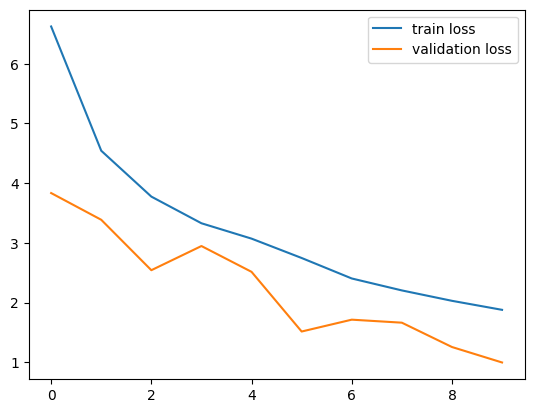

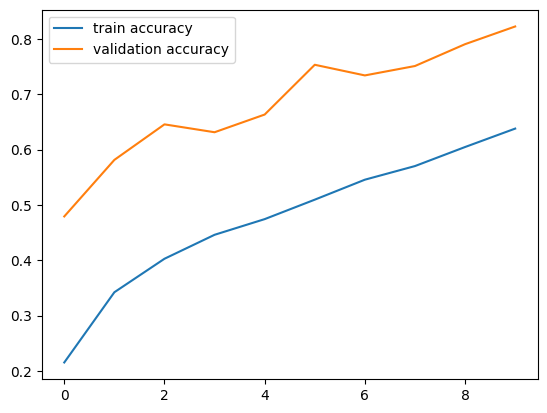

In [ ]:
h = history
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

In [ ]:
def totalFruit(fruits):
        """
        :type fruits: List[int]
        :rtype: int
        """
        fruits = fruits
        list = []
        num = []
        n = 0
        x = 0
        for i in fruits:
            if i in list:
                list.append(i)
                n += 1
            else:
                if x < 2:
                    list.append(i)
                    n+=1
                    x+=1
                else:
                    num.append(n)
                    n = 1
                    a = [list[-1]]
                    x=1
                    j = len(list) - 2
                    while list[j] == a[0]:
                      a.append(list[j])
                      n += 1
                      j -= 1
                    list = a
                    list.append(i)
                    n+=1
                    x+=1
        num.append(n)
        return max(num)

In [ ]:
totalFruit([1,2,1,1,1,2,2,4,3,4,3,4,3,4,3])

8